In [2]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import re
from PIL import Image

mask_idx = np.arange(15)

x_paths = sorted([str(fn) for fn in Path('./wrist_dataset/AP_DRR_DATA/AP_DRR').rglob('*.png')])
y_paths = []
for m in mask_idx:
    y_paths.append(sorted([str(fn) for fn in Path('./wrist_dataset/AP_mask/').rglob(f'*_{m}.png')]))

data_dict = {}

for id in range(15):
    for y in y_paths[id]:
        data_dict[y.split('/')[-1][0:8]] = {}

for id in range(15):
    for y in y_paths[id]:
        aa = re.search(r"(?<=mask_)\d+", y.split("/")[-1]).group(0)
        #print(f"id : {id}, search : {aa}")
        #print(id == int(re.search(r'(?<=mask_)\d+', y.split('/')[-1]).group(0)))
        if id == int(re.search(r'(?<=mask_)\d+', y.split('/')[-1]).group(0)):
            data_dict[y.split('/')[-1][0:8]][id] = y
            
#print(len(data_dict))
#print(data_dict.keys())
data_keys = sorted(data_dict.keys())
img_dict = {}
for d, img in zip(data_keys, x_paths):
    img_dict[d] = img
print(img_dict)

{'11440165': 'wrist_dataset/AP_DRR_DATA/AP_DRR/11440165.png', '13680046': 'wrist_dataset/AP_DRR_DATA/AP_DRR/13680046.png', '14006021': 'wrist_dataset/AP_DRR_DATA/AP_DRR/14006021.png', '14695058': 'wrist_dataset/AP_DRR_DATA/AP_DRR/14695058.png', '14704464': 'wrist_dataset/AP_DRR_DATA/AP_DRR/14704464.png', '15555247': 'wrist_dataset/AP_DRR_DATA/AP_DRR/15555247.png', '16858608': 'wrist_dataset/AP_DRR_DATA/AP_DRR/16858608.png', '17167615': 'wrist_dataset/AP_DRR_DATA/AP_DRR/17167615.png', '17178754': 'wrist_dataset/AP_DRR_DATA/AP_DRR/17178754.png', '18231968': 'wrist_dataset/AP_DRR_DATA/AP_DRR/18231968.png', '18585090': 'wrist_dataset/AP_DRR_DATA/AP_DRR/18585090.png', '19980977': 'wrist_dataset/AP_DRR_DATA/AP_DRR/19980977.png', '21221291': 'wrist_dataset/AP_DRR_DATA/AP_DRR/21221291.png', '21400568': 'wrist_dataset/AP_DRR_DATA/AP_DRR/21400568.png', '21859944': 'wrist_dataset/AP_DRR_DATA/AP_DRR/21859944.png', '22098386': 'wrist_dataset/AP_DRR_DATA/AP_DRR/22098386.png', '22260167': 'wrist_data

/home/sonic/workfolder/seg_test


FileNotFoundError: [Errno 2] No such file or directory: './mask_saved/11440165.png'

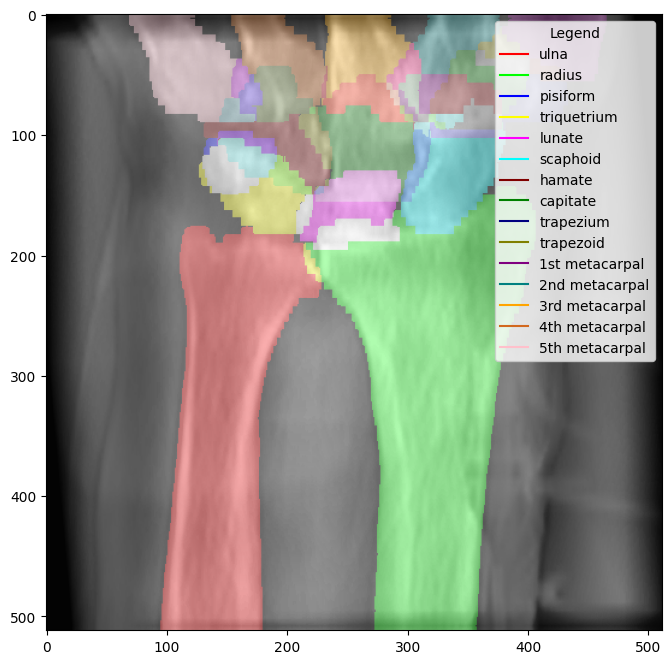

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image
import os

distinct_colors = [
    (255/255, 0/255, 0/255),    # Red
    (0/255, 255/255, 0/255),    # Green
    (0/255, 0/255, 255/255),    # Blue
    (255/255, 255/255, 0/255),  # Yellow
    (255/255, 0/255, 255/255),  # Magenta
    (0/255, 255/255, 255/255),  # Cyan
    (128/255, 0/255, 0/255),    # Maroon
    (0/255, 128/255, 0/255),    # Green (a different shade)
    (0/255, 0/255, 128/255),    # Navy
    (128/255, 128/255, 0/255),  # Olive
    (128/255, 0/255, 128/255),  # Purple
    (0/255, 128/255, 128/255),  # Teal
    (255/255, 165/255, 0/255),  # Orange
    (210/255, 105/255, 30/255),# Dark Gray
    (255/255, 192/255, 203/255),# Pink
]


standard_labels = {
    0: 'ulna',
    1: 'radius',
    2: 'pisiform',
    3: 'triquetrium',
    4: 'lunate',
    5: 'scaphoid',
    6: 'hamate',
    7: 'capitate',
    8: 'trapezium',
    9: 'trapezoid',
    10: '1st metacarpal',
    11: '2nd metacarpal',
    12: '3rd metacarpal',
    13: '4th metacarpal',
    14: '5th metacarpal'
}

# Create a legend for the masks
legend_labels = [mask for mask in standard_labels.values()]

# Create a custom colormap using distinct_colors
custom_cmap = ListedColormap(distinct_colors)

#for p, pat_id in enumerate(data_keys):

if not os.path.exists('./masks_saved'):
    os.mkdir('./masks_saved')

for p, pat_id in enumerate(data_keys):
#for p, pat_id in enumerate(['21971712', '22338743', '29453782', '31650315', '32456910', '41365900', '48145563', '51134848', '71900025']):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
    img = Image.open(img_dict[pat_id]).convert('RGB')
    img = np.array(img).astype(np.uint8)
    
    ax.imshow(img)
    handles = []
    
    overlay = np.zeros_like(img)
    
    for id in range(len(distinct_colors)):
        if id in list(data_dict[pat_id].keys()):
            msk = Image.open(data_dict[pat_id][id]).convert('L')
            msk = np.array(msk)
            msk[msk > 127] = 255
            msk[msk != 255] = 0
            color_mask = np.zeros_like(img)
            color_mask[:, :, 0] = msk * distinct_colors[id][0]
            color_mask[:, :, 1] = msk * distinct_colors[id][1]
            color_mask[:, :, 2] = msk * distinct_colors[id][2]
            overlay += color_mask
            
            # Create a binary mask for the outline
            outline_mask = np.zeros_like(msk)
            outline_mask[1:-1, 1:-1] = msk[1:-1, 1:-1] & ~msk[:-2, 1:-1] & ~msk[1:-1, :-2]
            outline_color = (0, 0, 0)  # Black
            overlay[:, :, 0] = np.where(outline_mask, outline_color[0], overlay[:, :, 0])
            overlay[:, :, 1] = np.where(outline_mask, outline_color[1], overlay[:, :, 1])
            overlay[:, :, 2] = np.where(outline_mask, outline_color[2], overlay[:, :, 2])
            
            handles.append(ax.plot([], [], color=distinct_colors[id], label=legend_labels[id])[0])
    
    overlay = np.clip(overlay, 0, 255)
    img_overlay = cv2.addWeighted(img, 0.7, overlay.astype(np.uint8), 0.3, 0)
    ax.imshow(img_overlay, cmap=custom_cmap)
    
    ax.legend(handles=handles, title='Legend', bbox_to_anchor=(1, 1))
    #plt.show()
    #print(os.getcwd())
    plt.savefig(f'./masks_saved/{pat_id}.png')
    plt.close() 
    #break   
    #if p == 10:
        #break  # You might want to remove this break depending on your use case


In [29]:
# Copy the excel Dump files.
# Align the distorted labels.

import os
import shutil
import pandas as pd

standard_labels = {
    0: 'ulna',
    1: 'radius',
    2: 'pisiform',
    3: 'triquetrium',
    4: 'lunate',
    5: 'scaphoid',
    6: 'hamate',
    7: 'capitate',
    8: 'trapezium',
    9: 'trapezoid',
    10: '1st metacarpal',
    11: '2nd metacarpal',
    12: '3rd metacarpal',
    13: '4th metacarpal',
    14: '5th metacarpal'
}

key_lst = list(standard_labels.keys())
val_lst = list(standard_labels.values())



if not os.path.exists('../DUMPS'):
    os.mkdir('../DUMPS')

print(len(data_keys))

print(os.getcwd())
#dumps = sorted([str(fn) for fn in Path('../wrist').rglob('3DView.Dump*')])
dumps = sorted([str(fn) for fn in Path('../DUMPS').rglob('3DView.Dump*')])

for dir in dumps:
    
    id = dir.split('/')[-1][13:21]
    
    if id in data_keys:
        print(id)
        #print(dir.split('/')[-1][13:21])
        #shutil.copy(dir, '../DUMPS/' + dir.split('/')[-1])
        csv = pd.read_csv(dir, encoding='latin-1').tail(-1)
        csv.index = range(len(csv))
        #print(f"order of {dir.split('/')[-1][13:21]} :\n {csv['3D_annotation']}\n")
        
        '''
        for annot in csv['3D_annotation']:
            stripped_annot = annot.strip('\n').strip()
            if not stripped_annot in standard_labels.values():
                print(f"{stripped_annot} missing in {dir.split('/')[-1][13:21]}.") 
        '''
        
        base_dir = f"./wrist_dataset/AP_mask/{id}"
        
        
        if not os.path.exists(f"./wrist_dataset/AP_mask/{id}/masks"):
            os.mkdir(f"./wrist_dataset/AP_mask/{id}/masks")
        
        annot_list = [annot.strip('\n').strip() for annot in csv['3D_annotation']]
        #print(annot_list)
        
        if len(annot_list) != 15 or len([str(p) for p in Path(base_dir).rglob('*.png')]) != 15:
            print(f"missing idxs, {id}, {len([str(p) for p in Path(base_dir).rglob('*.png')])}")
            continue
        
        continue
        
        for idx in range(len(standard_labels)):
            src_idx = annot_list.index(standard_labels[idx])
            dst_idx = idx
            shutil.copy(src = base_dir + f'/{id}_mask_{src_idx}.png',
                            dst = base_dir + '/masks/' + f'{id}_mask_{dst_idx}.png'
                            )
            os.remove(base_dir + f'/{id}_mask_{src_idx}.png')  
            '''
            if annot_list[idx] != standard_labels[idx]:
                pos = val_lst.index(annot_list[idx].strip('\n').strip())
                right_idx = key_lst[pos]
                print(f"correction of {idx} as {right_idx} : {id}")
                
                shutil.copy(src = base_dir + f'/{id}_mask_{idx}.png',
                            dst = base_dir + '/masks/' + f'{id}_mask_{right_idx}.png'
                            )
                os.remove(base_dir + f'/{id}_mask_{idx}.png')
            '''
        
        
        
        
    
    else:
        #print(dir.split('/')[-1][13:21])
        pass



131
/home/sonic/workfolder/seg_test
11440165
13680046
14006021
14695058
14704464
15555247
16858608
17167615
17178754
18231968
18585090
19980977
21221291
21400568
21859944
21971712
missing idxs, 21971712, 14
22098386
22260167
22338743
missing idxs, 22338743, 14
23222771
23444278
23448179
23494103
23609044
23815988
23816183
24510419
25163854
25223004
25983623
26101082
26119728
26168061
27434653
27494460
27672619
28025014
29453782
missing idxs, 29453782, 14
29716166
29759389
29784727
29789366
29931693
30590434
30590566
30748101
31267302
31401140
31650315
missing idxs, 31650315, 14
32163528
32255890
32291795
32456910
missing idxs, 32456910, 14
32481093
32913747
33015824
34070709
34157288
34416019
34849619
35457626
35602712
35992080
36783311
37001283
37372303
37444361
37656133
38304877
38615438
38758018
39599894
39998307
40354387
41365900
missing idxs, 41365900, 14
41482191
41578535
41744154
41780934
41809152
42153263
42390000
42722070
42935410
43044209
44414313
44466446
44494528
44600417
4

In [ ]:
dumps = sorted([str(fn) for fn in Path('../wrist').rglob('DUMPS3DView.Dump*')])